# A Physicist's Crash Course on Artificial Neural Network

Before I start anything, I would express my thanks to Shashank Shalgar @ LANL.

In [1]:
# This cell is to prepare the notebook. Skip to the next section

# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
from scipy.special import expit

import timeit

from IPython.display import Image

## The Crash Course 

This the theory presented in a introductory manor.

### What is a Neuron

What a neuron does is to response when a stimulation is given. This response could be strong or weak or even null. If I would draw a figure, of this behavior, it looks like this.

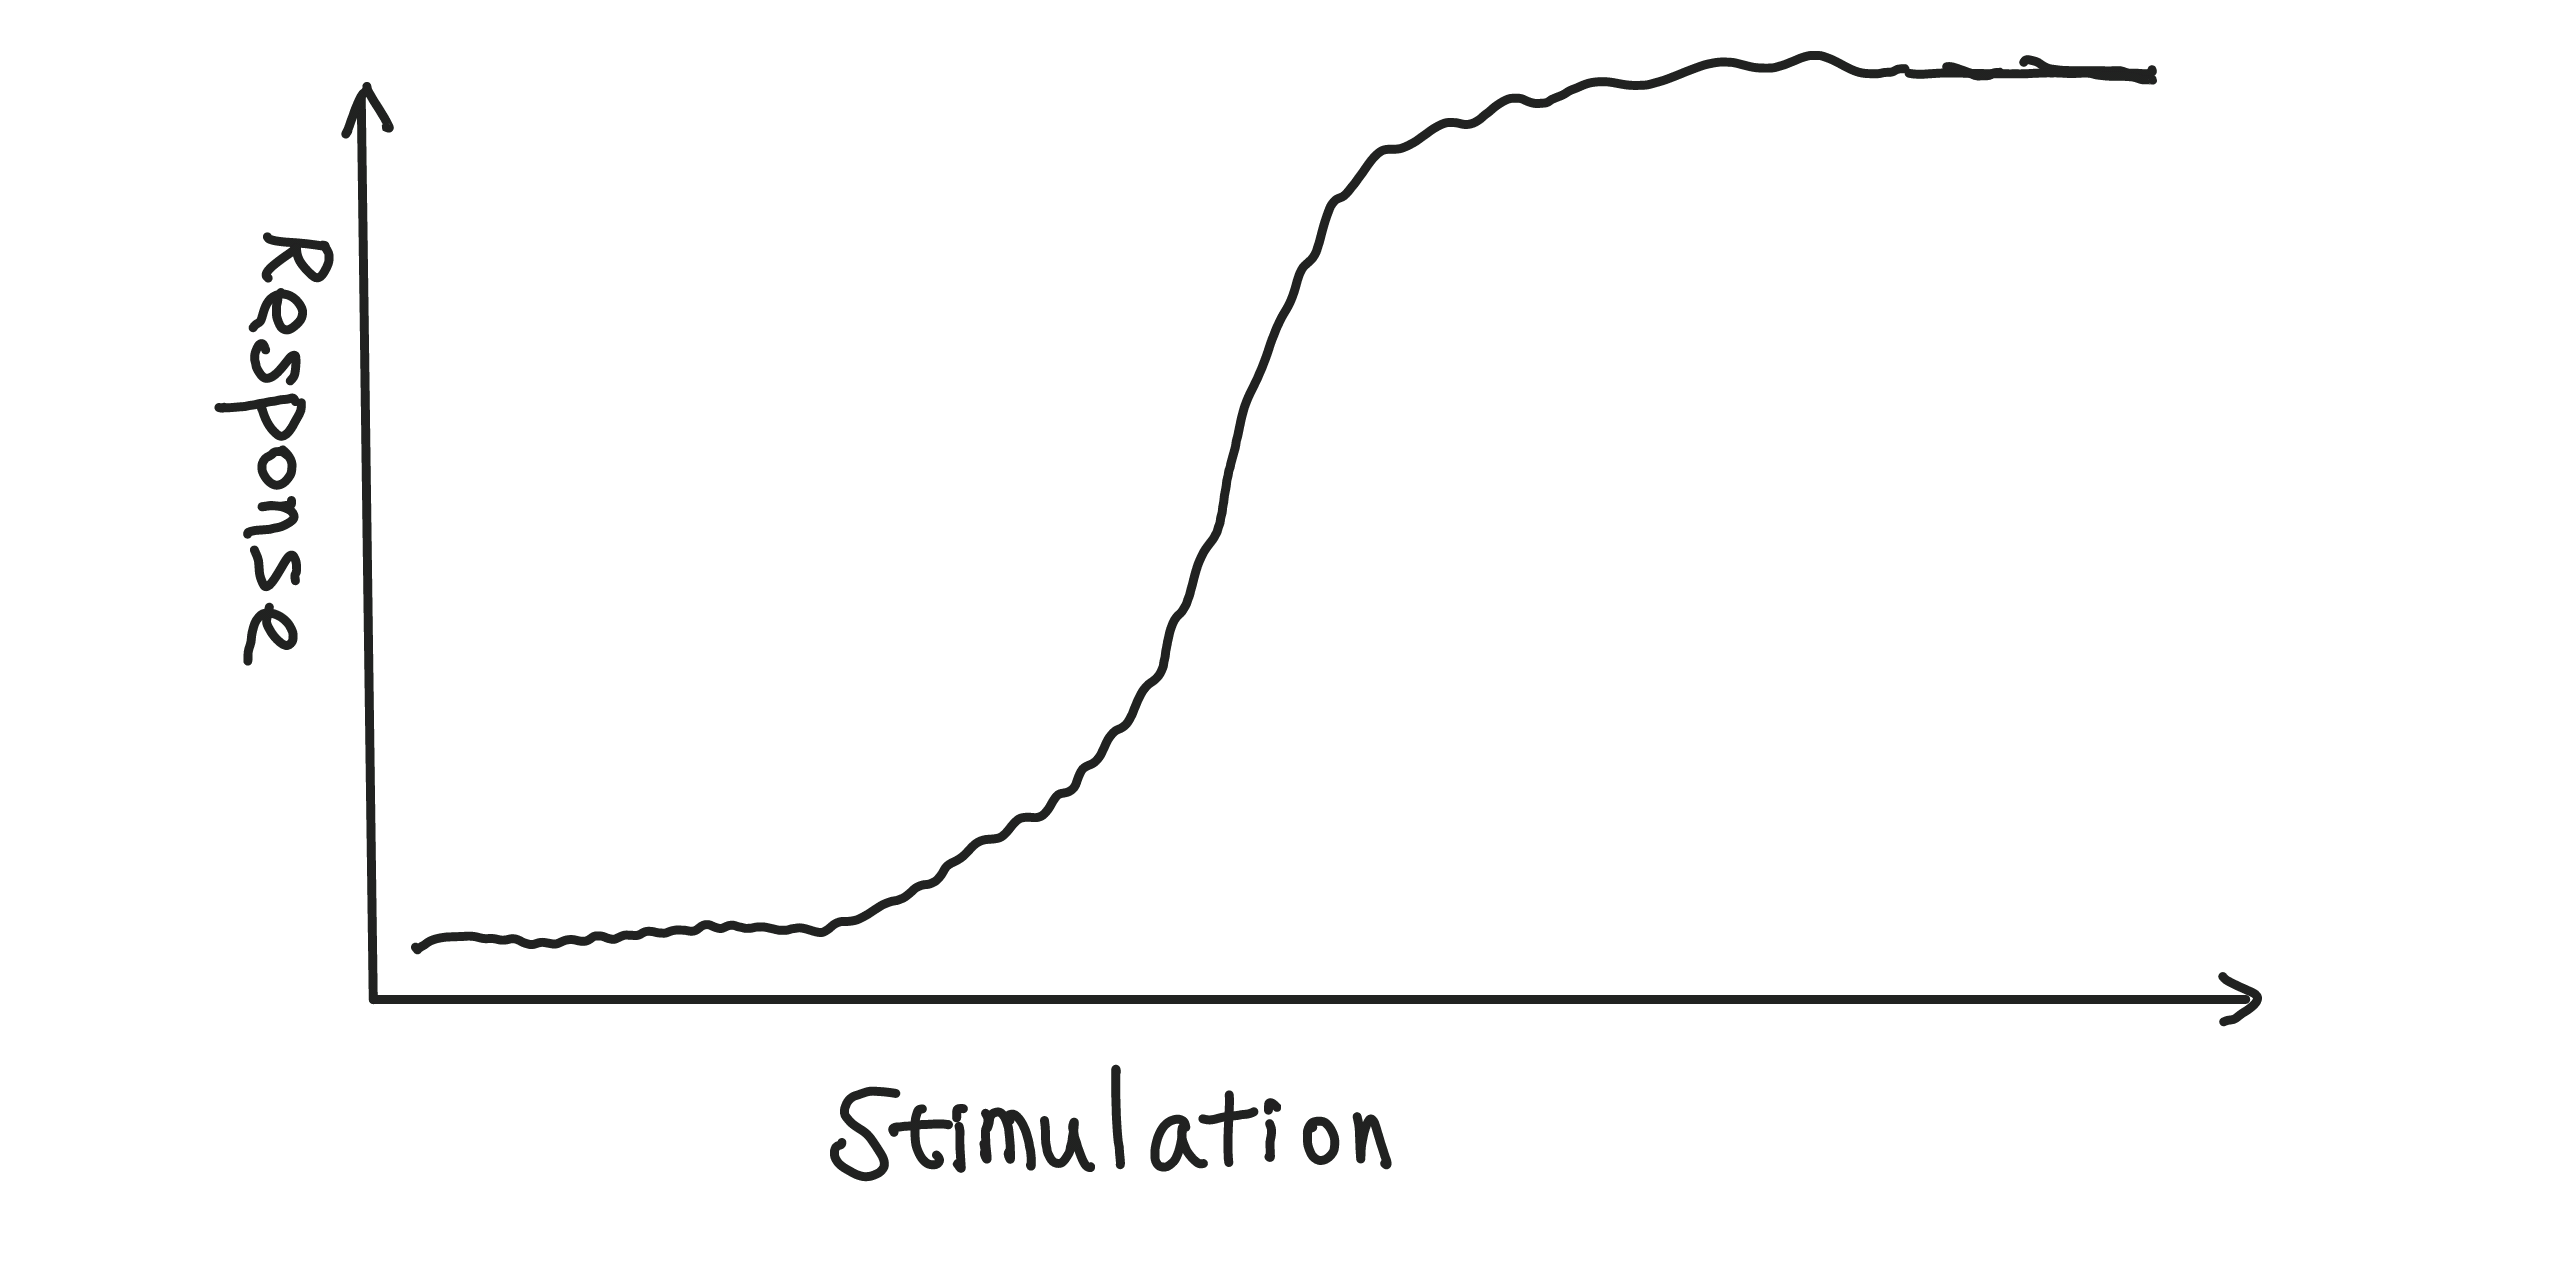

In [2]:
Image(filename='assets/images/neuronResponse.png',width=900)

However, each neuron is different from other neurons.

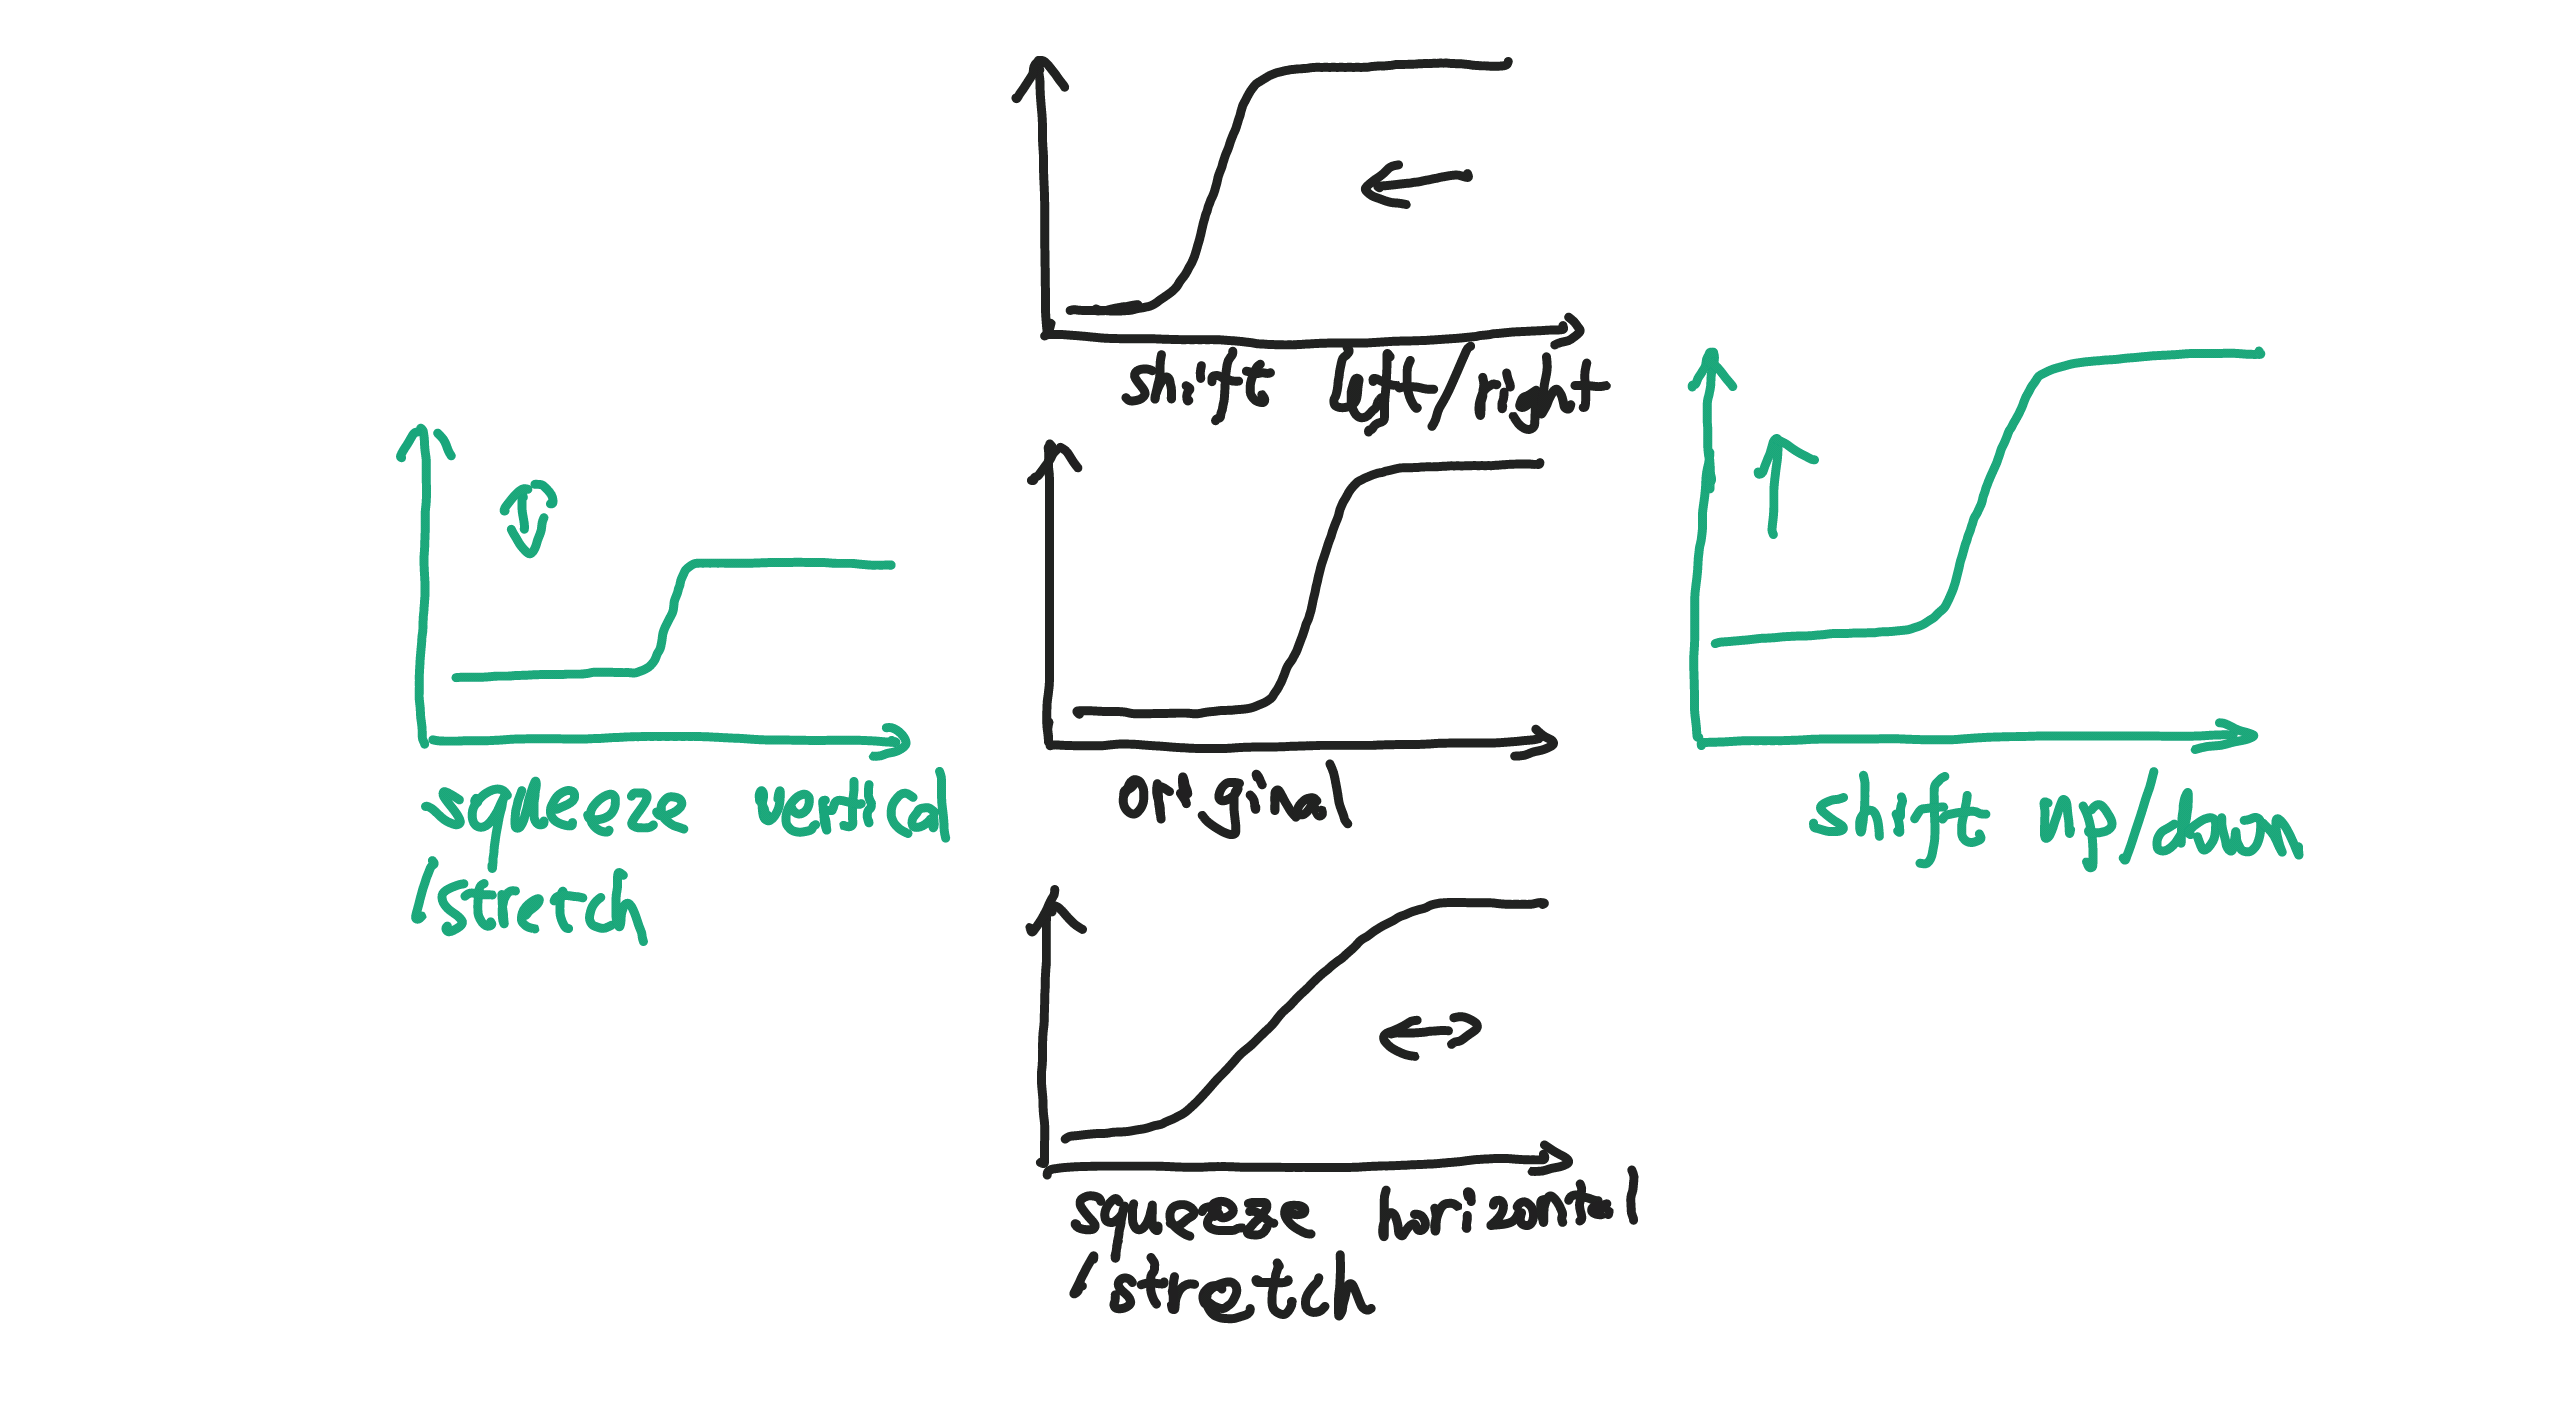

In [3]:
Image(filename='assets/images/transformActivation.png',width=900)

### Artificial Neural Network

A simple network is a collection of neurons that response to stimulations, which could be the responses of other neurons.

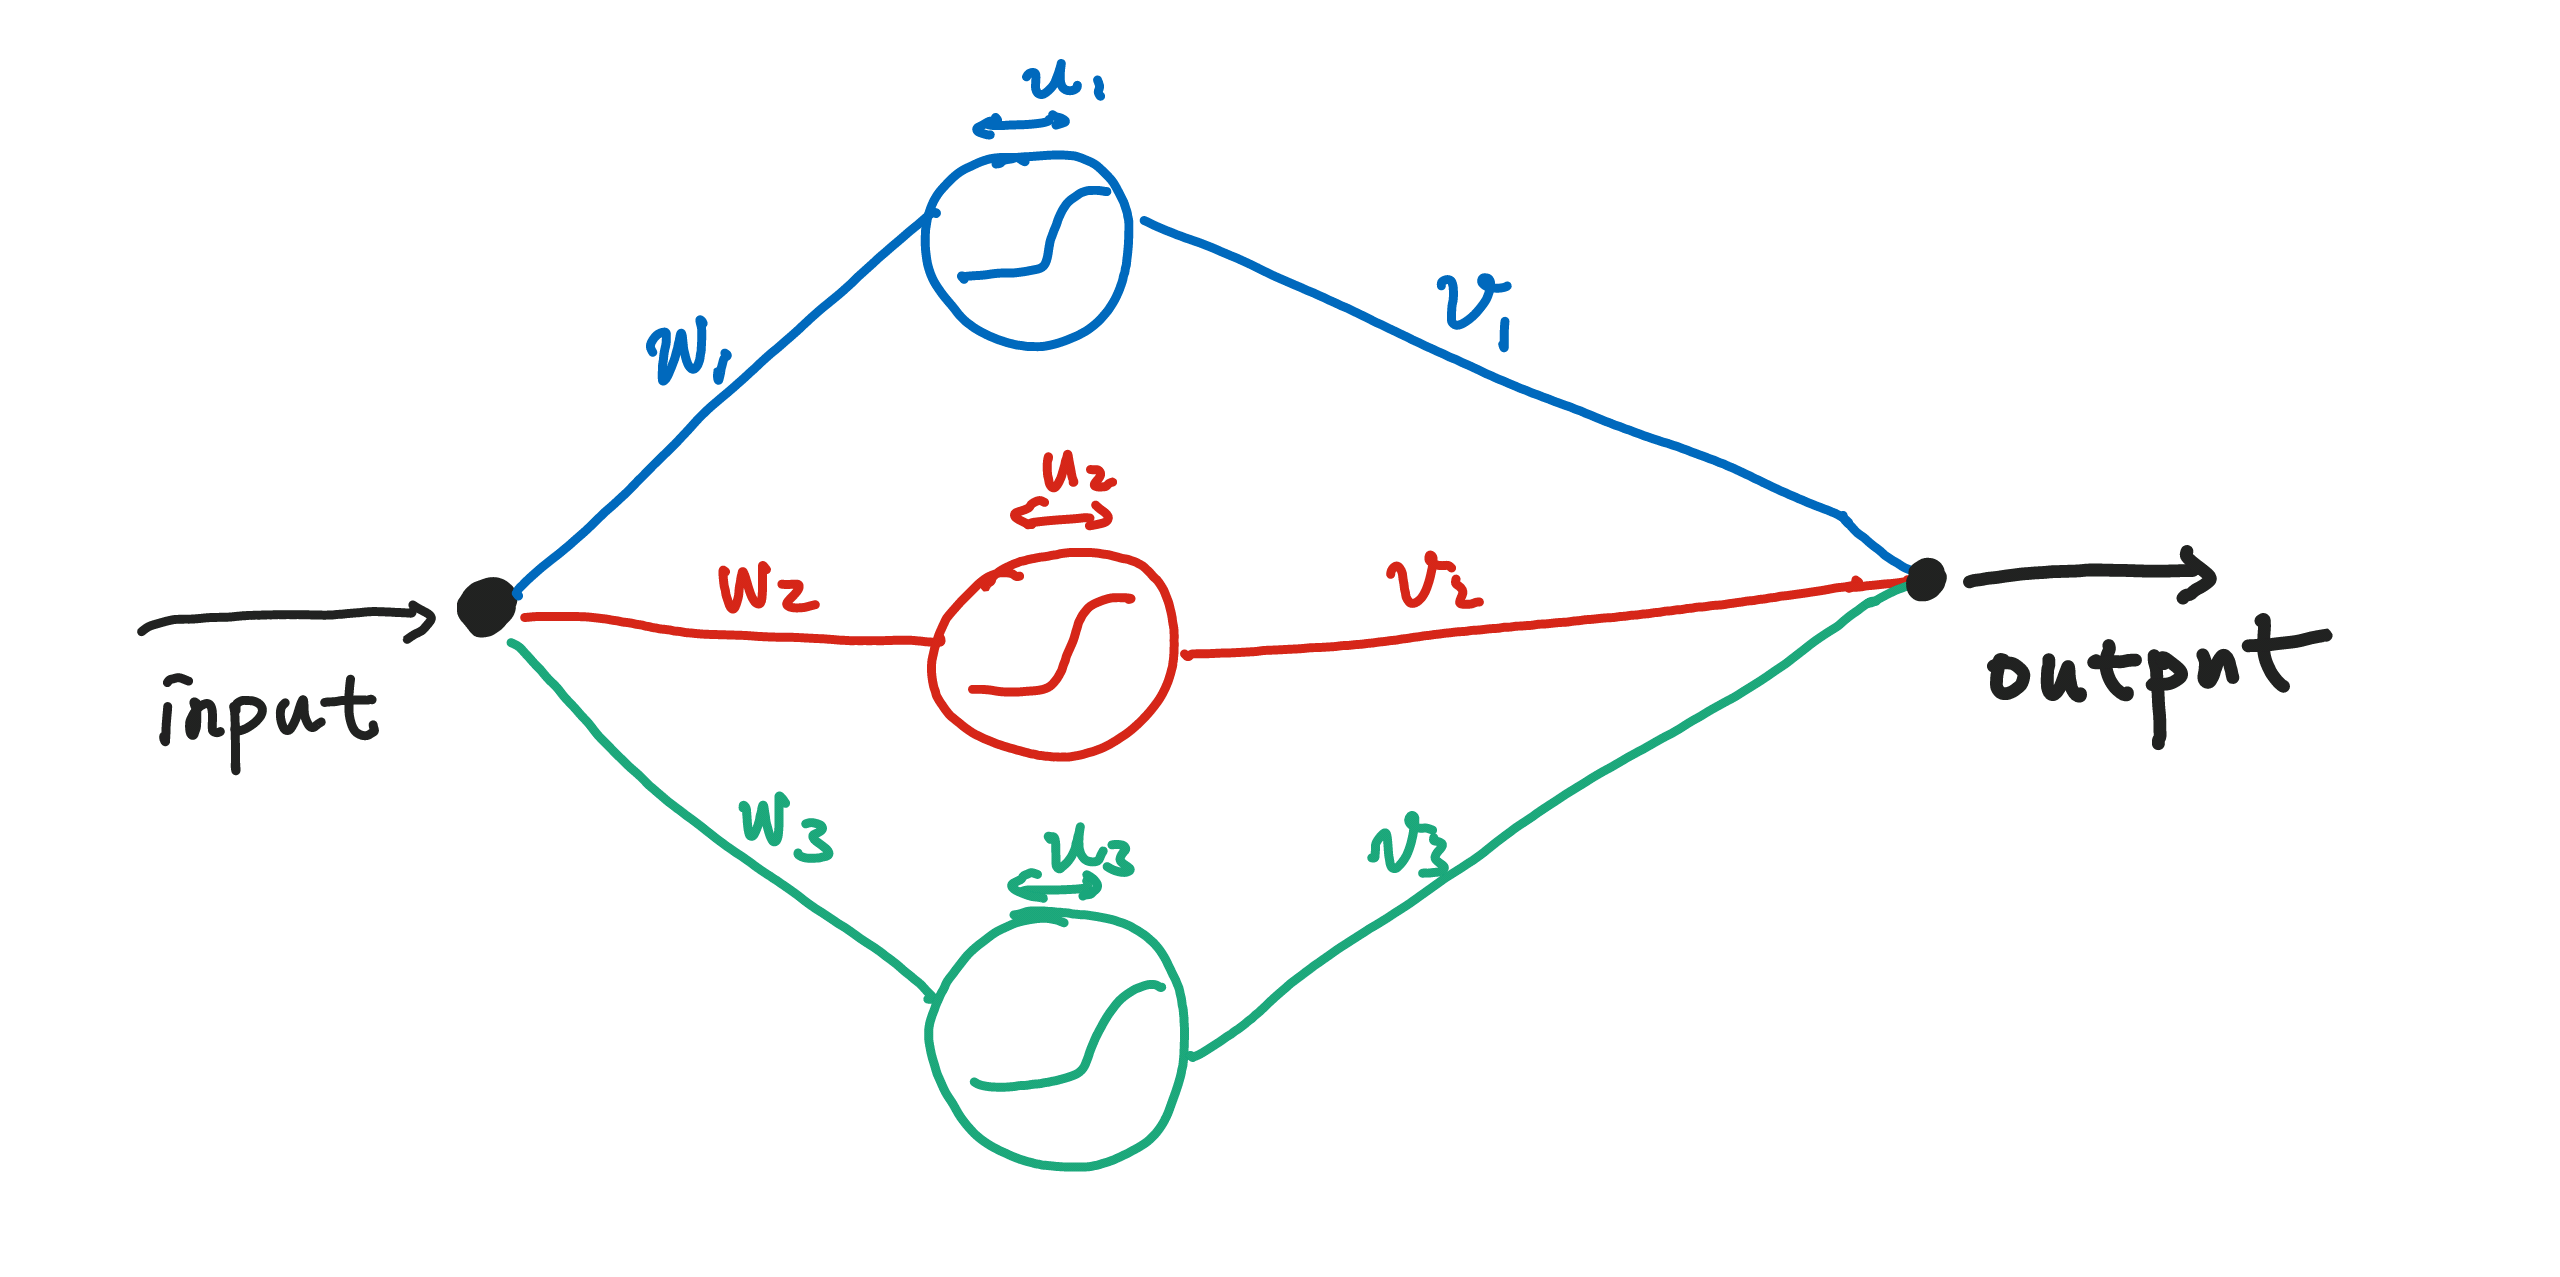

In [4]:
Image(filename='assets/images/neuralNetworkSimple.png',width=900)

A given input signal is spreaded onto three different neurons. The neurons respond to this signal sperately then summed together with different weights. In the language of math, given input $x$, output $y(x)$ is

$$ y(x) = \sum_{k=1}^{3} x v_k * \text{activation}( w_k * x + u_k )  $$

where $\text{activation}$ is the activation function, i.e., the response behavior of the neuron. This is a single layer structure.

A lot of different ways could be used to extend this network. 


* Increase the number of neurons on one layer.
* One can extend the number of layers.



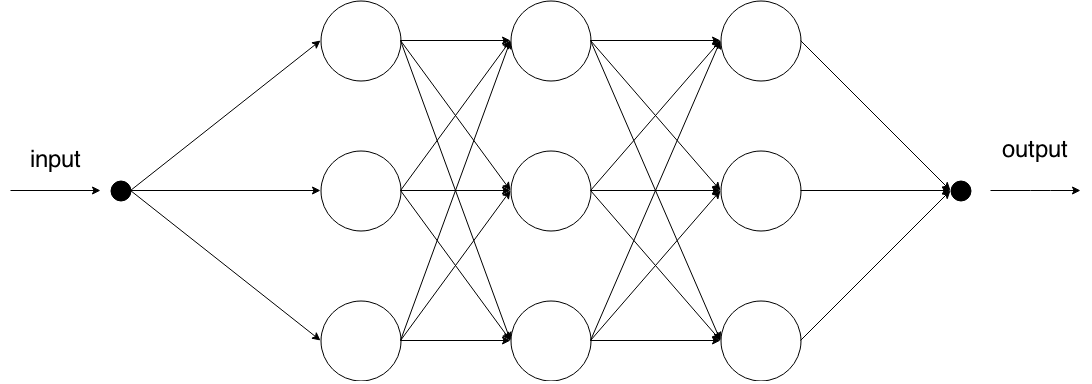

In [5]:
Image(filename='assets/images/multilayer.png',width=900)

* We could also include interactions between the neurons.
* Even memory can be simulated.



### How it works

Here is an exmaple of how the network works.


We are going to do two things.

1. Find out which temperature is hot which is cold.
2. Find out which room is habitable in terms of temperature.

The first task can be done using one neuron. If a set of parameters are properly chosen, a single neuron will finish the task.

We have a input temperature and a output that tells us which is high temperature which is low temperature. In the following example, $T_1$ is low temperature, $T_2$, $T_3$ are high temperatures.



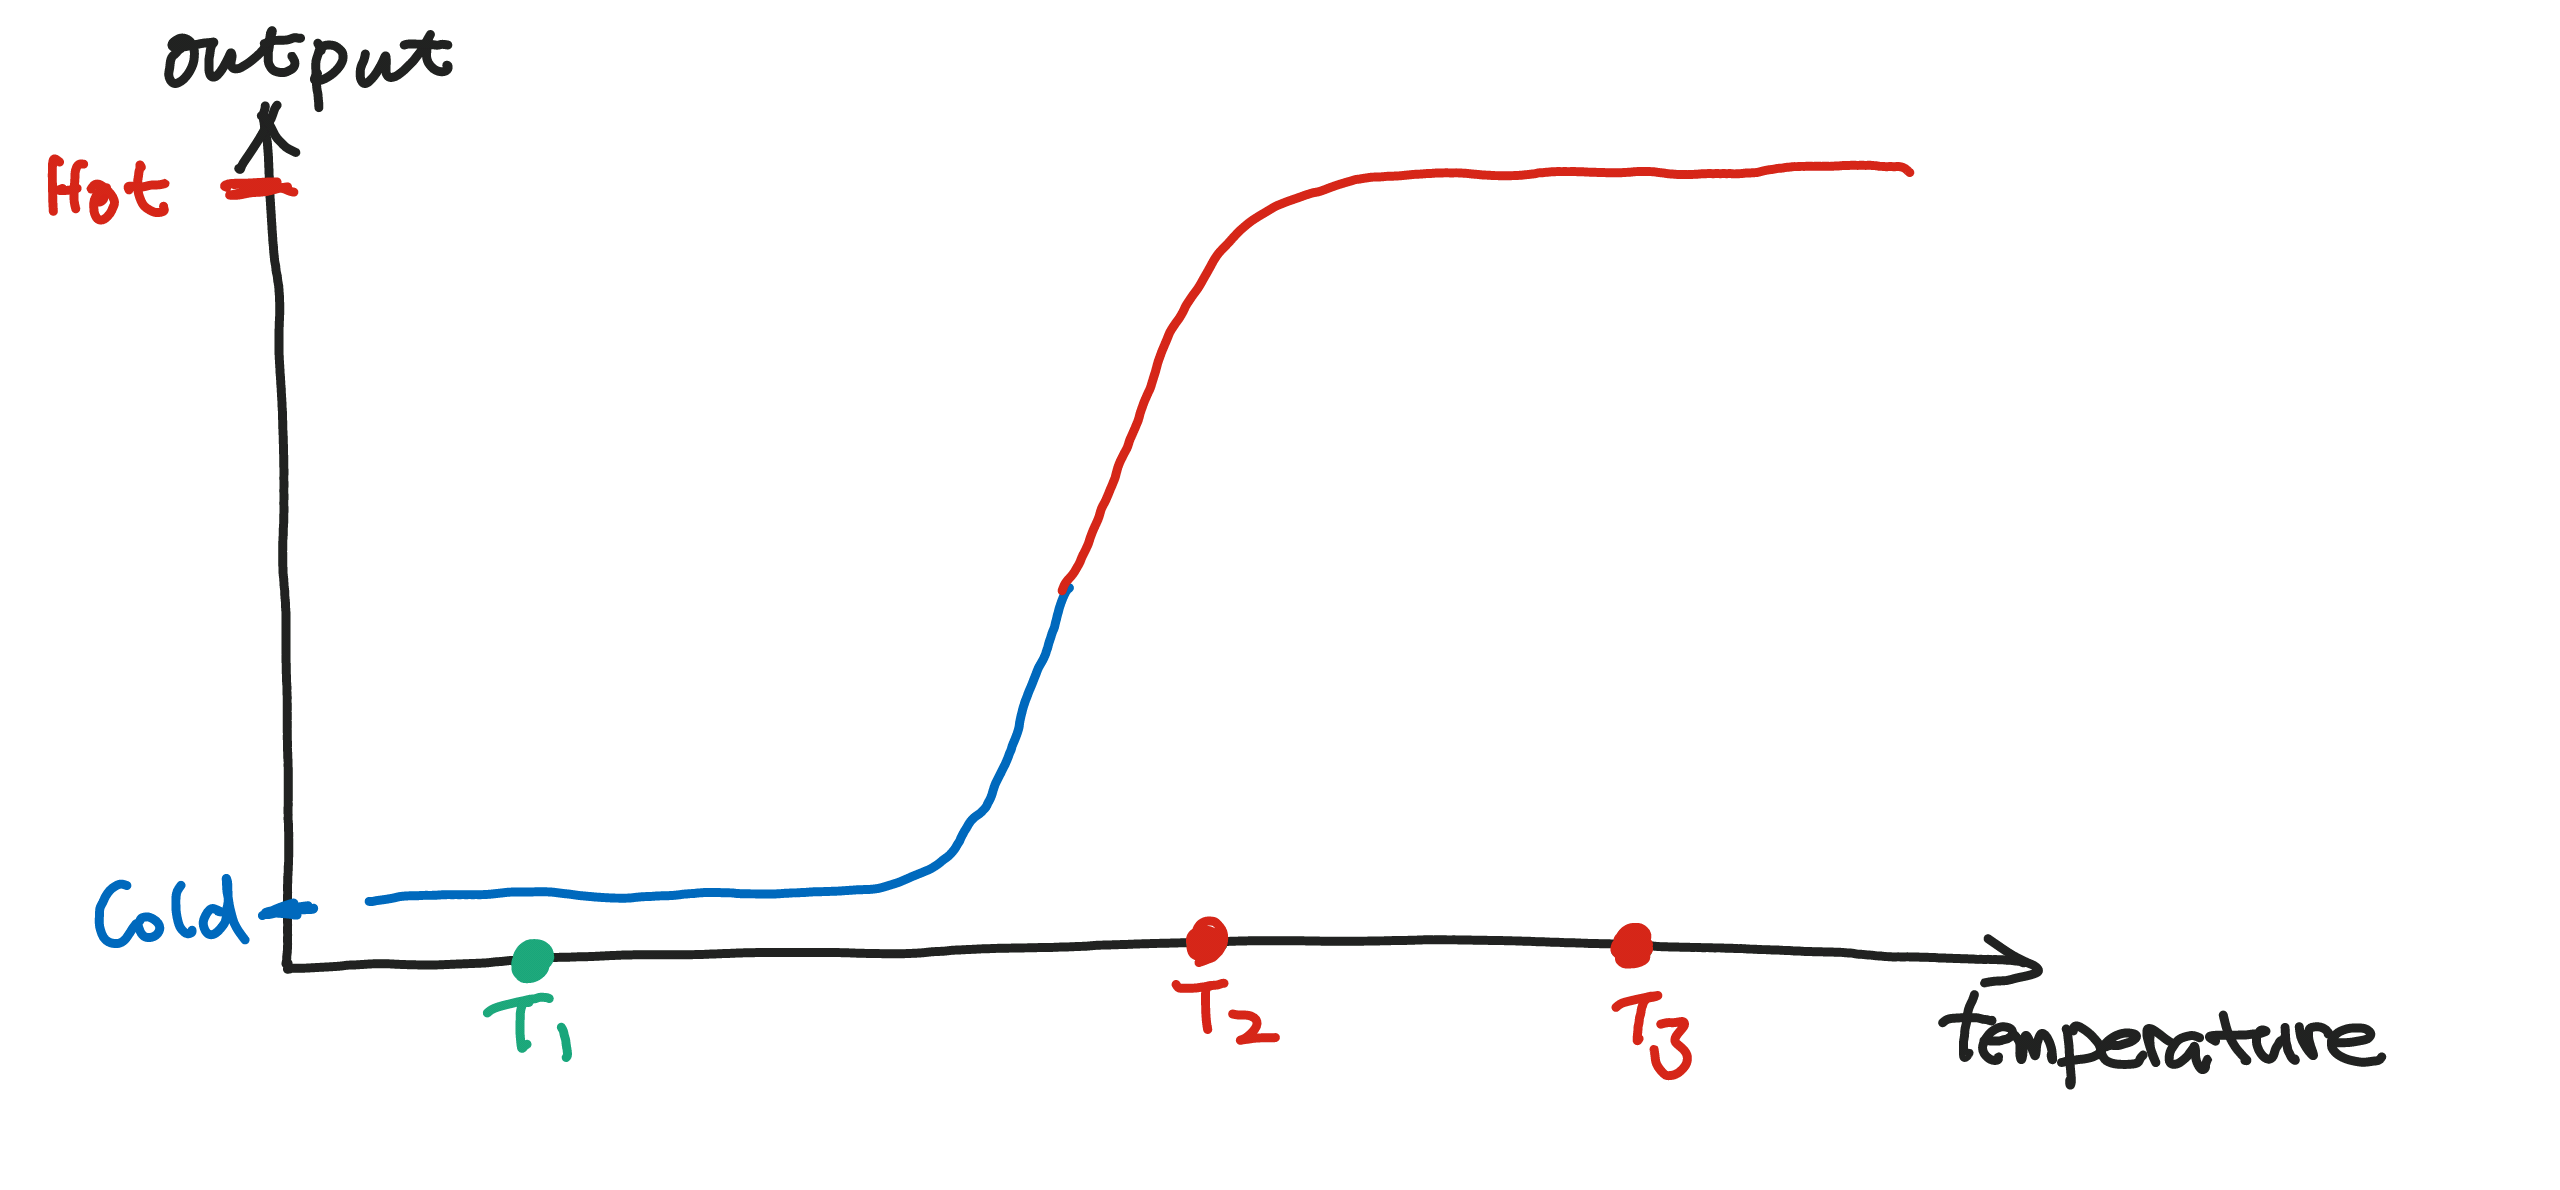

In [6]:
Image(filename='assets/images/1neuronClassification.png',width=900)

Suppose we have only two neurons in the network.

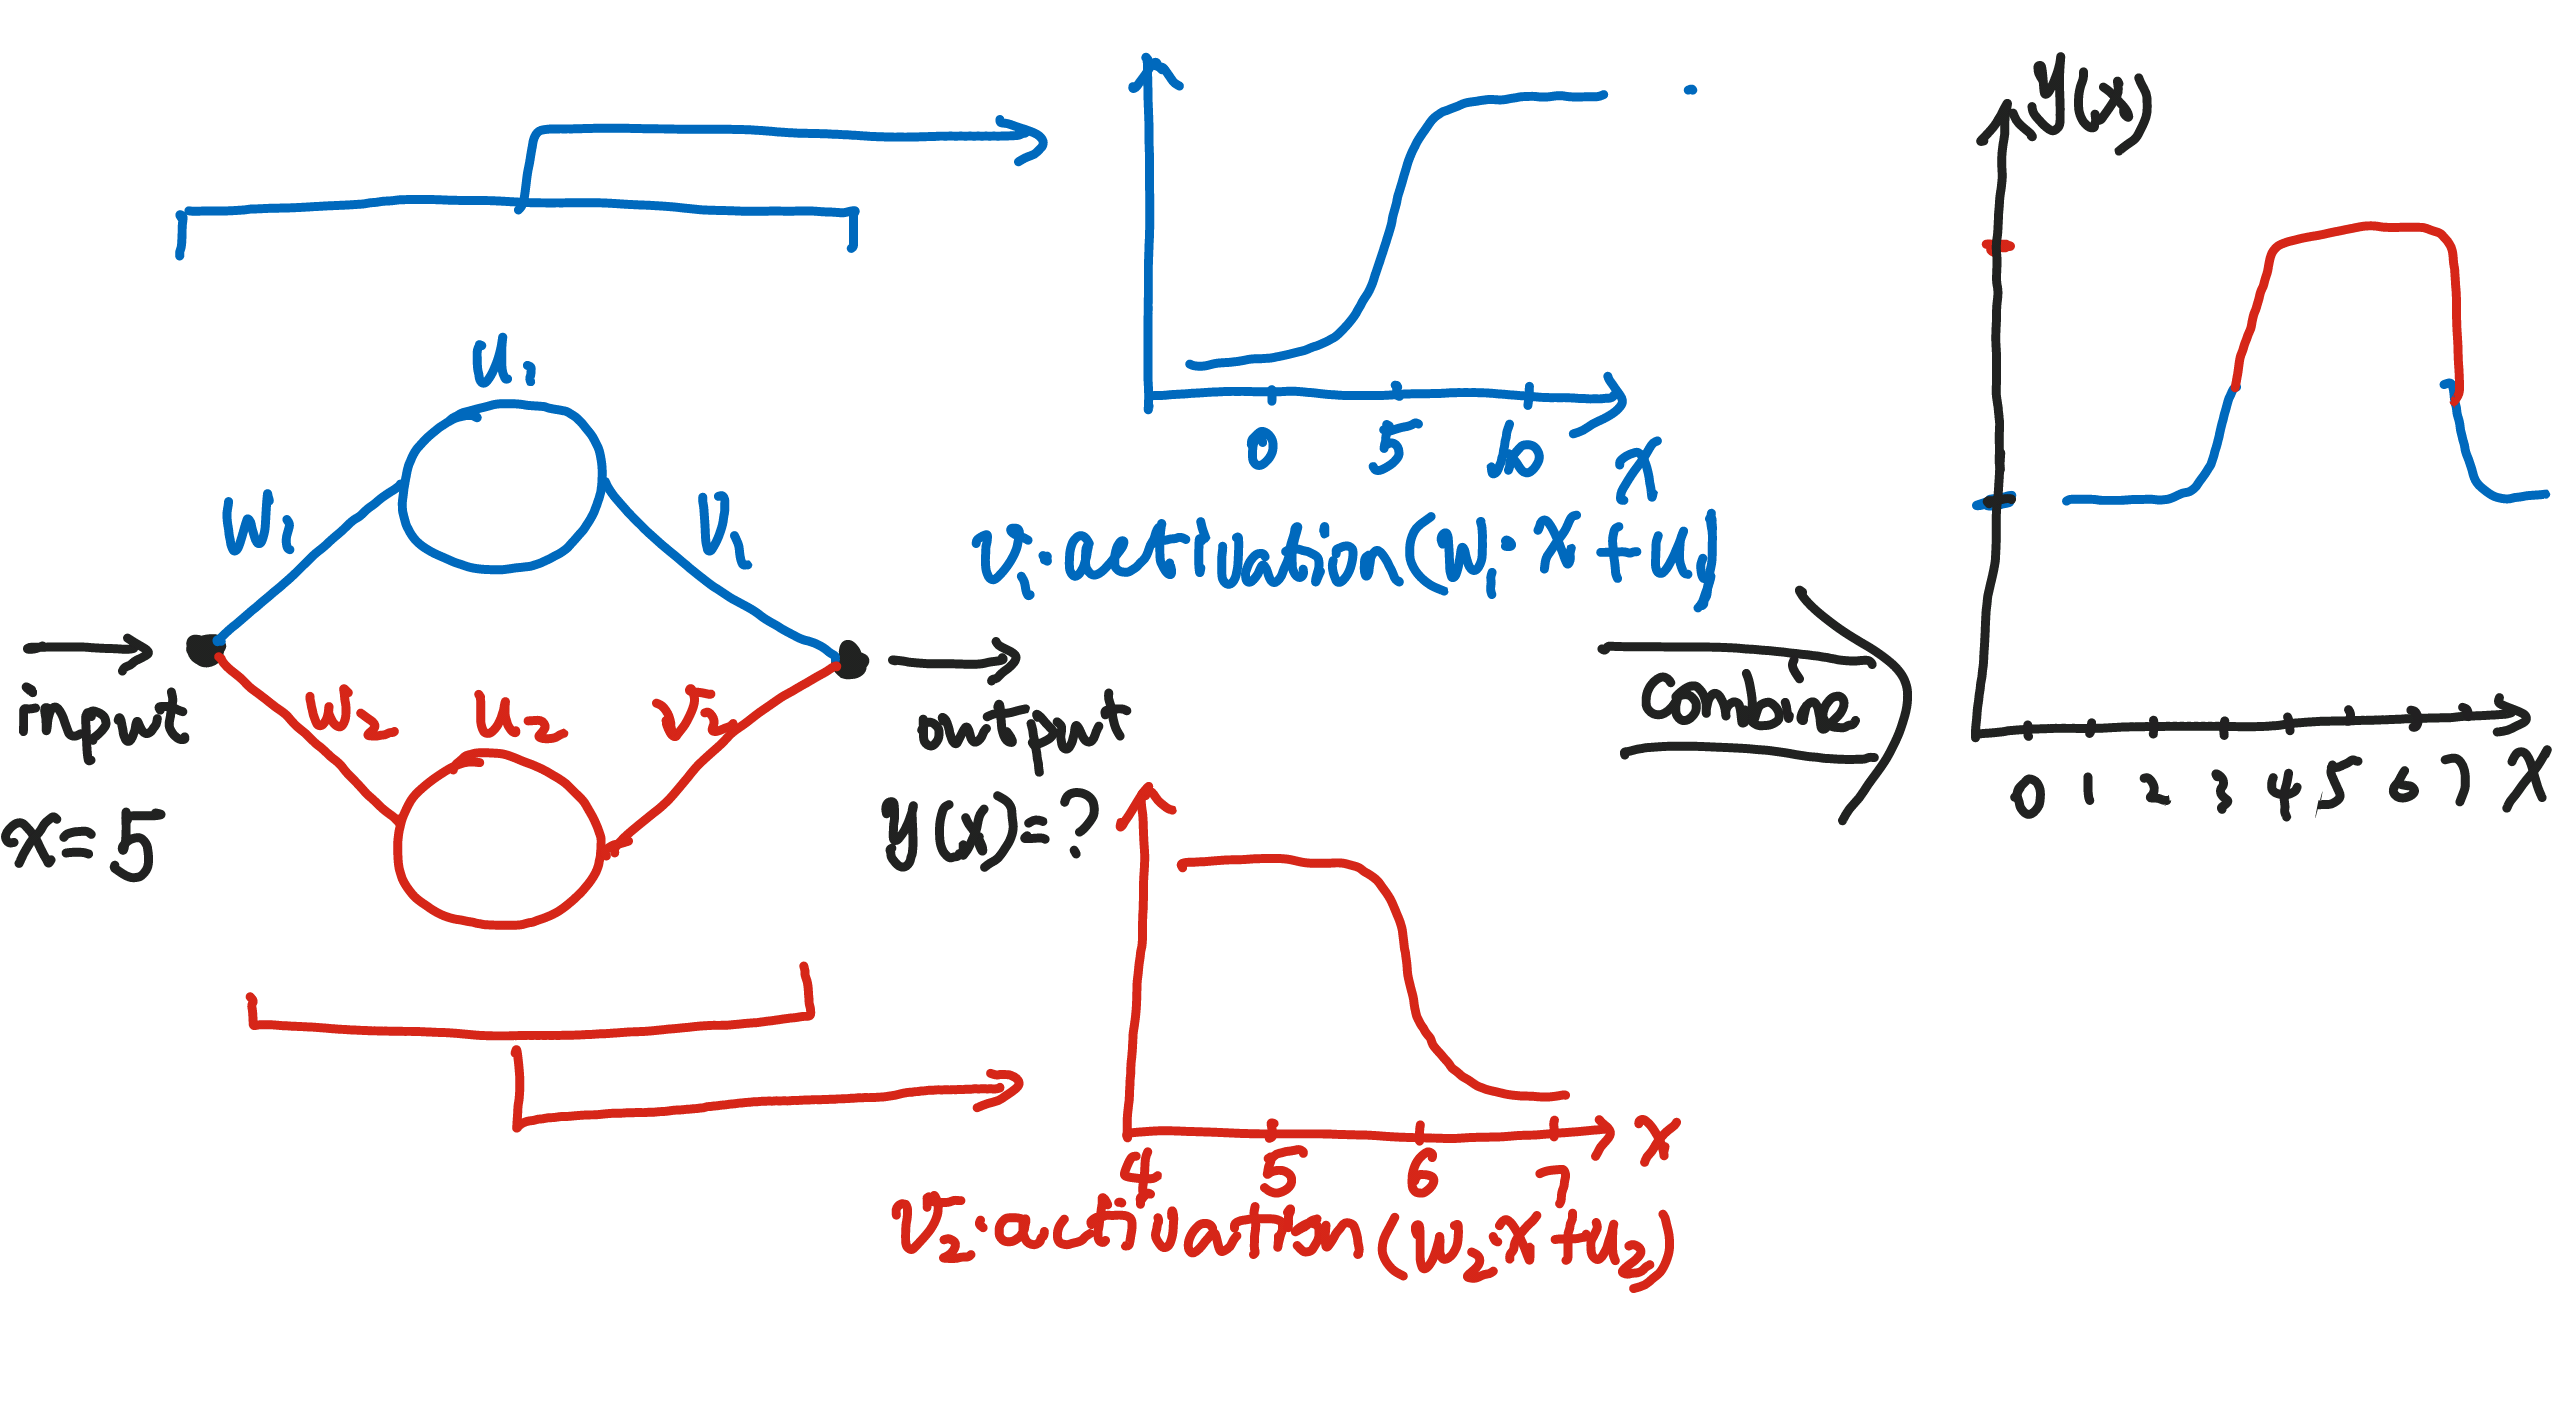

In [7]:
Image(filename='assets/images/2neuronNet.png',width=900)

Seen from this example, we can expect neural network to be good at classification. 

And how is this going to help us with the identification of habitable places? Suppose we have three room with temperature $T_1$, $T_2$, $T_3$ respectively. Only $T_2$ falls into the region of high output value which corresponds to the habitable temperature in our net.


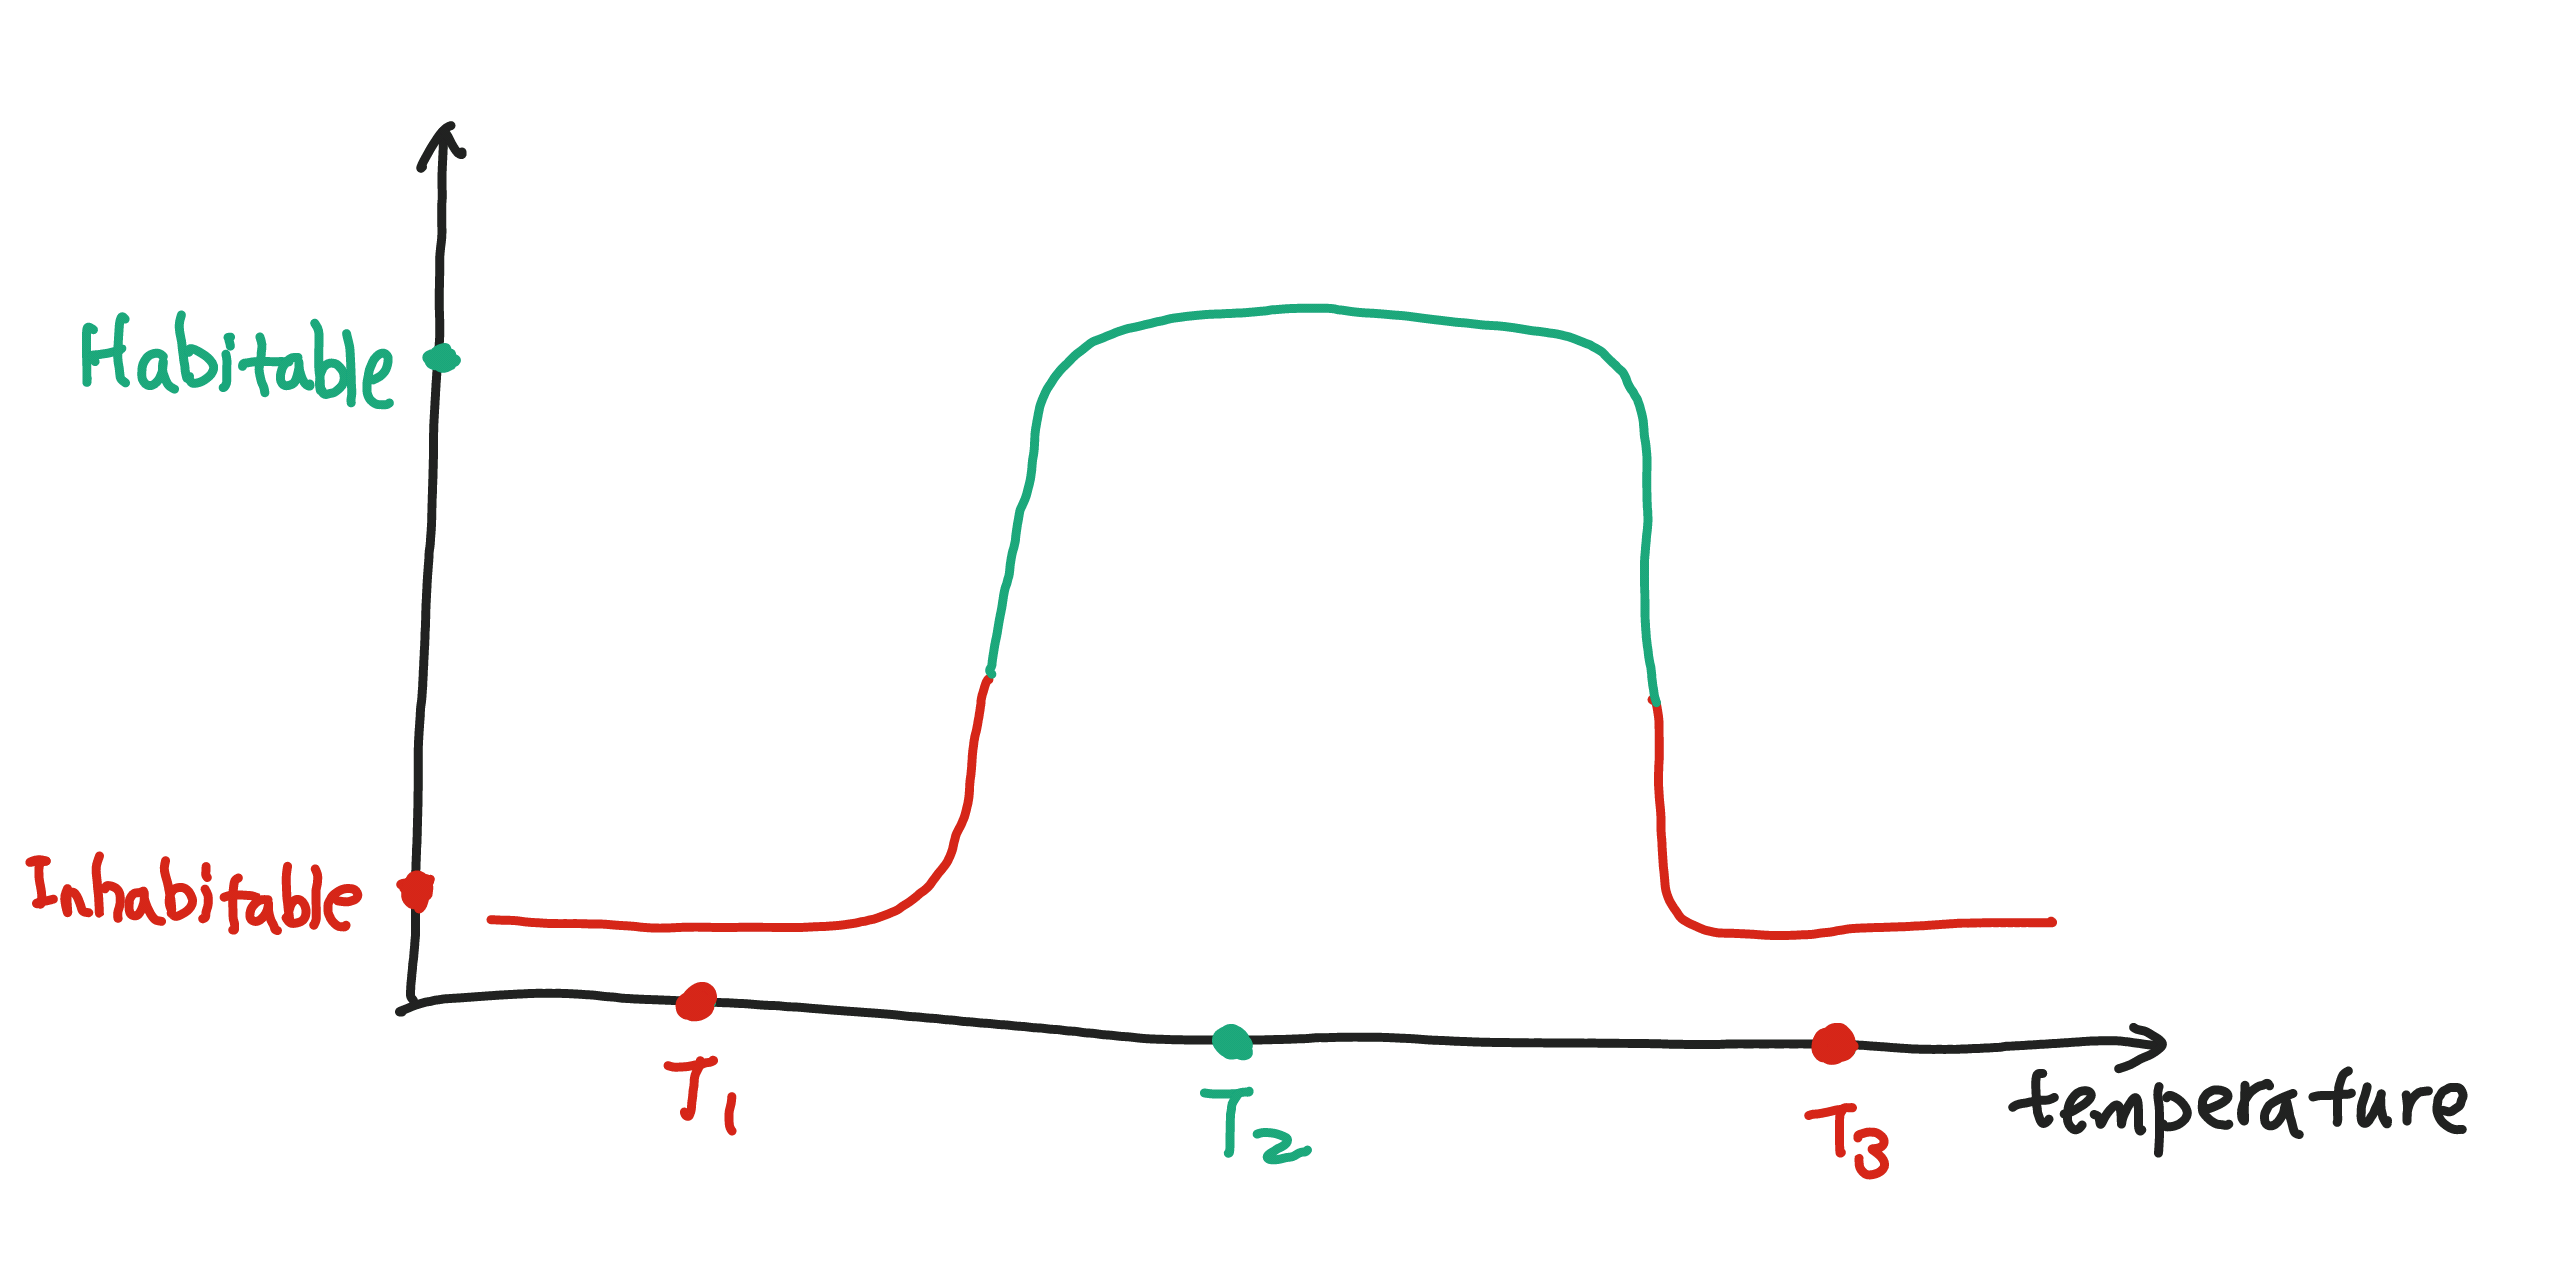

In [8]:
Image(filename='assets/images/2neuronClassification.png',width=900)

That reminds me of Fourier Analysis. And there is a connection. The activation functions here, which is for a general purpose, are chosen to be universal approximators. These activations can be used to approximate all smooth functions well using a finite number of neurons. Fourier analysis, on the other hand requires infinite to be exact. However in some cases we don't need infinite Fourier terms as we only need a good approximation.

### Training

We have got a lot of paramters with the set up of the network. The parameters are the degree of freedom we have. **The question is how to get the right paramters.**

The Network NEEDS TRAINING. Just like human learning, the neural network have to be trained using prepared data. One example would be

|  input | 0 |   1  |   2  |   3   |   4   |    5   |    6   |    7    |    8   |    9    |
|:------:|:-:|:----:|:----:|:-----:|:-----:|:------:|:------:|:-------:|:------:|:-------:|
| output | 1 | 0.37 | 0.14 | 0.050 | 0.018 | 0.0067 | 0.0025 | 0.00091 | 0.0004 | 0.00012 |

This set of data, to have some insight, a human would put them on a plot.

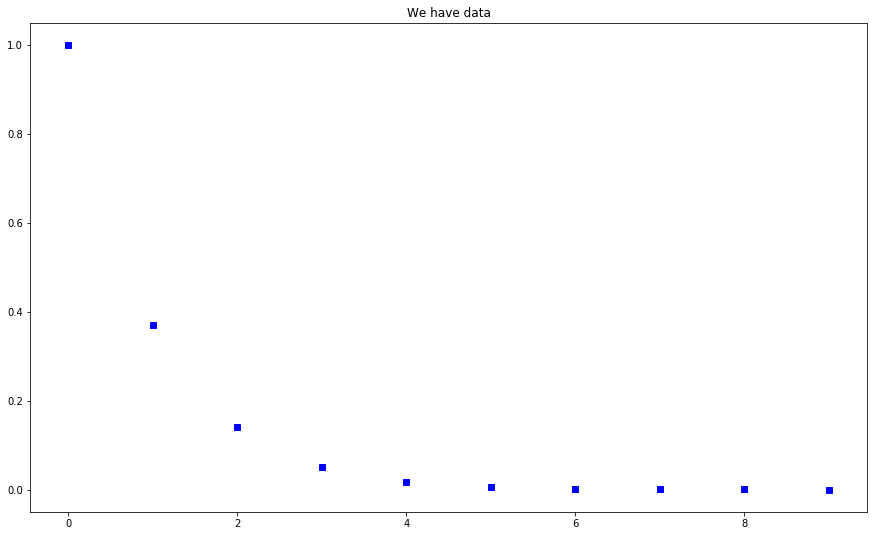

In [9]:
thTrainingData1 = np.array([[0,1,2,3,4,5,6,7,8,9],[1,0.37,0.14,0.050,0.018,0.0067,0.0025,0.00091,0.0004,0.00012]])
plt.figure(figsize=(15,9))
plt.plot(thTrainingData1[0],thTrainingData1[1],'bs')
plt.title("We have data")
plt.show()

A well trained human immediately recognize the patern, which is somewhat close to a exponential decay behavior. However, we wouldn't do any numerical calculation of expontential functions. We just see it because we have seen a lot.

We also expect that if we have one more data point from the same mechanism to be placed on the graph, it should apear near a line of exponential decay.

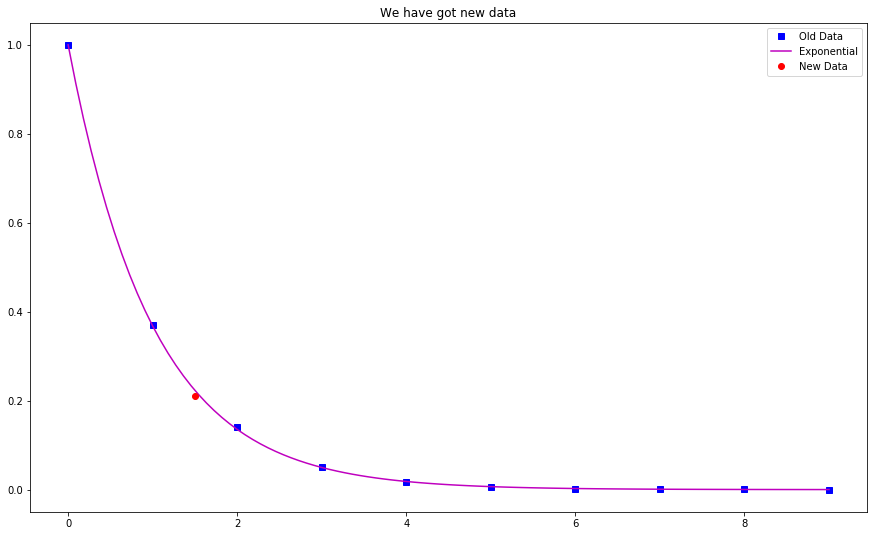

In [10]:
plt.figure(figsize=(15,9))
plt.plot(thTrainingData1[0],thTrainingData1[1],'bs',label='Old Data')
plt.plot(np.linspace(0,9,100),np.exp(-np.linspace(0,9,100)),'m',label='Exponential')
plt.plot(np.array([1.5]),np.array([0.21]),'ro',label='New Data')
plt.title("We have got new data")
plt.legend()
plt.show()

OK. A red data point appears on the graph. It is close to the line of $f(x)=e^{-x}$. Not exactly on the line but close.

How do we teach a machine to do that? Train it using these 10 data point we have now.

We feed in one input, $0$, the net will give us a result. However, the result is not $1$ in general. Then we change the parameters until we have the output as $1$. We feed in another input $1$, and change the parameters until we have $0.37$. Hence the final outcome of this training process is that the machine gives us the right result given input in the data we have know.

After the training, we get a set of parameters, which should be preserved. This is the structure we need. The machine has learned everything.

Now keep the parameters fixed. Feed in a number $1.5$, the result from the net should be close to $2.2$. Now the net also learn the behavior of the data, nonetheless without calculating any exponential functions. 

This is amazing. The machine doesn't have any idea of exponential but it can know the trend.

### Problems

Just as a human would do, the net can make mistakes. One of them is over-training. If we don't have enough degree of freedom and given to many data points, the network could be over-trained. It is going to be stubborn and resist to give the right trend.

## Code Practice

### Solving A Simple Differential Equation

The problem to solve is the differential equation $$\frac{d}{dt}y(t)= - y(t).$$ Using the network, this is $$y_i= 1+t_i v_k f(t_i w_k+u_k).$$

The procedures are

**Deal with the function first.**
   
1. The cost is $$I=\sum_i\left( \frac{dy_i}{dt}+y_i \right)^2.$$ Our purpose is to minimize this cost.
   
2. To calculate the differential of y, we can write down the explicit expression for it. $$\frac{dy}{dt} = v_k f(t w_k+u_k) + t v_k f(tw_k+u_k) (1-f(tw_k+u_k))w_k,$$ where the function f is defined as a trigf().

3. So the cost becomse $$I = \sum_i \left(  v_k f(t w_k+u_k) + t v_k f(tw_k+u_k) (1-f(tw_k+u_k)) w_k + y \right)^2.$$

In [40]:
def cost(v,w,u,t):
    v = np.array(v)   # Don't know why but np.asarray(v) doesn't work here.
    w = np.array(w)
    u = np.array(u)
    
    fvec = np.array(trigf(t*w + u) )  # This is a vector!!!
    yt = 1 + np.sum ( t * v * fvec  )  # For a given t, this calculates the value of y(t), given the parameters, v, w, u.
    
    return  ( np.sum (v*fvec + t * v* fvec * ( 1 -  fvec  ) * w ) + yt )   ** 2
    
    # return np.sum(np.array( v*np.array( trigf( np.array( t*w ) + u ) ) )  +  np.array( t*np.array( v*np.array( trigf(np.array( t*w ) + u)) )  )  * ( 1 - np.array( trigf( np.array( t*w )+u) ) ) * w + ( 1 + np.array( t*np.array( v*np.array( trigf( np.array(t*w)+u ) ) ) ) ) ) # trigf() should return an array with the same length of the input.

**Caution: a number times an array is not returned as array but instead as list. and list + list doesn't conserved the length of the list!**

Define the trigf() next, usually we use $$trigf(x)=\frac{1}{1+\exp(-x)}$$.

In [41]:
def trigf(x):
    #return 1/(1+np.exp(-x)) #
    return expit(x)

Test cost function:

In [42]:
test11 = np.ones(30)
cost(np.array([1,1,1]),[1,1,1],[1,1,1],1)

43.556874613889974

Next step is to optimize this cost. To do this we need the derivitive. But anyway let's try a simple minimization first.

In [43]:
def costTotal(v,w,u,t):
    t = np.array(t)
    costt = 0
    for temp in t:
        costt = costt + cost(v,w,u,temp)
        
    return costt



Test total cost

In [44]:
test11 = np.ones(30)
tlintest = np.linspace(0,1,2)
print( costTotal(np.ones(10),np.ones(10),2*np.ones(10),tlintest) )
print( costTotal(np.ones(10),np.ones(10),np.ones(10),tlintest) )

516.5795158579347
455.8125705579083


Suppose the parameters are five dimensional and we have 10 data points.

In [45]:
tlin = np.linspace(0,5,11)
print(tlin)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


Define a list divier that splits an array into three arrays.

In [46]:
## No need to define such a function! Use np.split(x,3) instead.
np.zeros(30)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
# This is only an example of 2dimensional neural network.
costTotalF = lambda x: costTotal(np.split(x,3)[0],np.split(x,3)[1],np.split(x,3)[2],tlin)

initGuess = np.zeros(30)
# initGuess = np.random.rand(1,30)+2
start1 = timeit.default_timer()
minim=minimize(costTotalF,initGuess,method="Nelder-Mead")
# minimize(costTotalF,initGuess,method="L-BFGS-B")
# minimize(costTotalF,initGuess,method="TNC")
stop1 = timeit.default_timer()

print( stop1 - start1)

5.436200118041597


It shows that the minimization depends greatly on the initial guess. It is not true for a simple scenario with gradient descent however it could be the case if the landscape is too complicated.

### Test Results

Plot!

In [48]:
def functionYNNSt(v,w,u,t): # t is a single scalar value
    
    t = np.array(t)
    
    return 1 +  np.sum(t * v * trigf( t*w +u ) )



def functionYNN(v,w,u,t):

    t = np.array(t)
    
    func = np.asarray([])
    
    for temp in t:
        func = np.append(func, functionYNNSt(v,w,u,temp) )
        
    return np.array(func)

def functionY(t):

    return np.exp(-t)

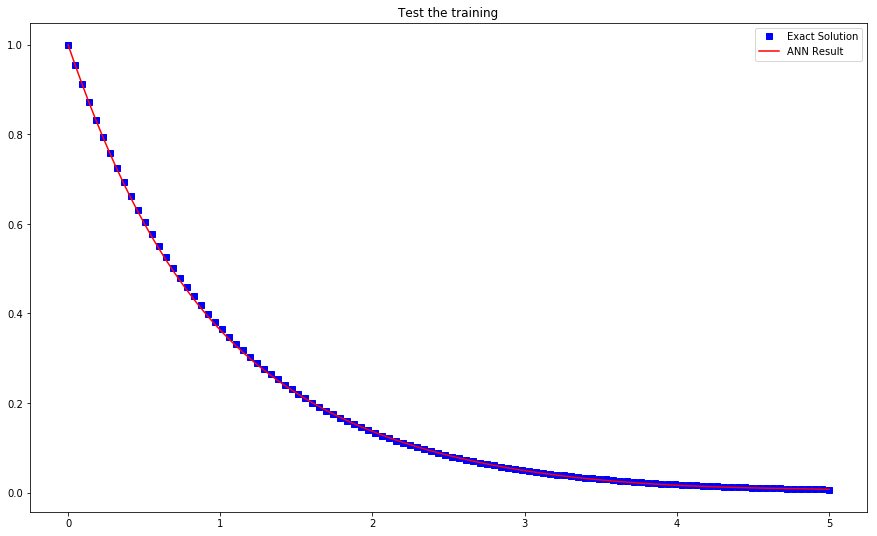

In [49]:
xresult=minim.x

# This is the output of neural network
temp14 = np.array([])
for i in np.linspace(0,5,110):
    temp14 = np.append(temp14,functionYNN(np.split(xresult,3)[0],np.split(xresult,3)[1],np.split(xresult,3)[2],np.array([i]))[0])

testTLin = np.linspace(0,5,110)
plt.figure(figsize=(15,9))
plt.plot(testTLin,functionY(testTLin),'bs',label='Exact Solution') # This is the exact solution to the differential equation
plt.plot(testTLin,temp14,'r-',label='ANN Result')
plt.title("Test the training")
plt.legend()
plt.show()


In [50]:
print(xresult)

[ 0.1330613   1.05982273  0.18777729 -0.60789078 -0.96393469 -0.65270373
 -1.55257864  0.8002259  -0.12414033 -0.21230861 -0.88629202  0.47527367
  0.21401419  0.2130512  -1.5236408   1.35208616 -0.48922234 -0.85850735
  0.72135512 -1.03407686  2.29041152  0.91184671 -0.56987761  0.16597395
 -0.43267372  2.1772668  -0.1318482  -0.80817762  0.44533168 -0.28545885]
